In [ ]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 
pd.set_option('max_columns', 100)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f = open("/content/drive/Shareddrives/Data Bowl Data/NFL Data /ALL WEEKS/Week1_Final.csv", "r")

week1_full = pd.read_csv(f,low_memory=False)
week1_full.head()

,time,gameId,playId,coverage,x,y,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,playDirection,route,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,distFromScrim
0,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,28.3,26.663333,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2,QB,1,away,left,NaN,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,1.7
1,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,31.1,16.863333,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27,SS,1,home,left,NaN,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,1.1
2,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,28.6,9.173333,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11,WR,1,away,left,HITCH,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,1.4
3,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,33.7,31.323333,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24,FS,1,home,left,NaN,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,3.7
4,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,29.2,17.183333,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12,WR,1,away,left,HITCH,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,0.8


# Football Field Creation

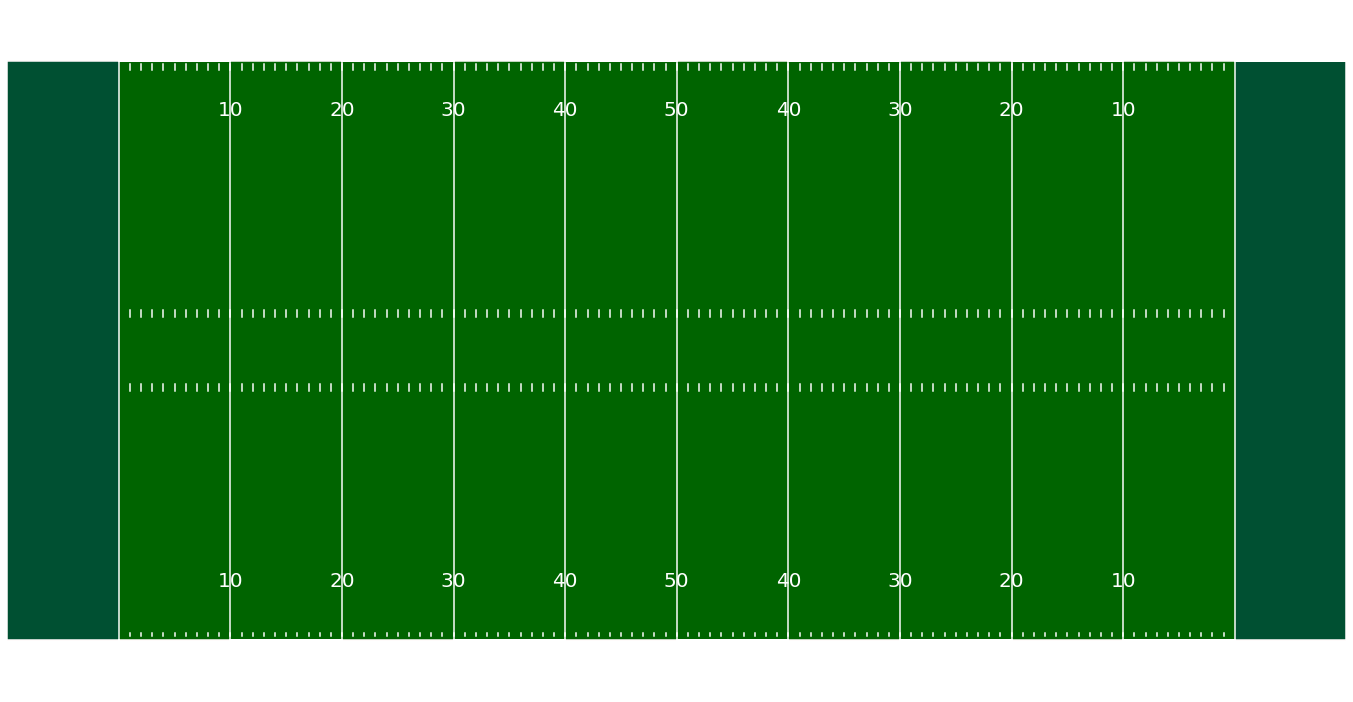

In [ ]:
def create_football_field(linenumbers=True, fifty_is_los=False, highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',):

    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1, edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=(24, 12.66))
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80, 80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')

    ez1 = patches.Rectangle((0, 0), 10, 53.3, linewidth=0.1, edgecolor='r', facecolor='blue', alpha=0.2, zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3, linewidth=0.1, edgecolor='r', facecolor='blue', alpha=0.2, zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
        
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10), horizontalalignment='center', fontsize=20, color='white')
            plt.text(x, 53.3 - 5, str(numb - 10), horizontalalignment='center', fontsize=20, color='white')
            
    hash_range = range(11, 110)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')
    
    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax


create_football_field()
plt.show()

# Adding Players 

In [ ]:
# Enter Game Id  & Play ID and run bellow cells and graph will be made 

gameId = 2018090600
playId = 75 
week1_full.query('gameId == @gameId')


,time,gameId,playId,coverage,x,y,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,playDirection,route,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,distFromScrim
0,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,28.3,26.663333,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2,QB,1,away,left,NaN,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,1.7
1,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,31.1,16.863333,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27,SS,1,home,left,NaN,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,1.1
2,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,28.6,9.173333,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11,WR,1,away,left,HITCH,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,1.4
3,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,33.7,31.323333,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24,FS,1,home,left,NaN,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,3.7
4,2018-09-07T01:07:14.599Z,2018090600,75,Cover 3 Zone,29.2,17.183333,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12,WR,1,away,left,HITCH,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,1899-12-30 15:00:00.000,90.0,NaN,NaN,C,10,10,0.261827,0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78989,2018-09-07T04:24:10.900Z,2018090600,4472,Cover 4 Zone,109.3,12.163333,0.45,0.00,156.63,198.20,None,2555383.0,Jalen Mills,31,CB,55,home,left,NaN,(:01) (Shotgun) M.Ryan pass incomplete short l...,4,1,5,ATL,play_type_pass,PHI,5,EMPTY,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,12.0,18.0,1899-12-30 00:01:00.000,15.0,NaN,NaN,I,0,0,-4.197485,0,4.3
78990,2018-09-07T04:24:10.900Z,2018090600,4472,Cover 4 Zone,118.7,28.943333,1.17,0.13,207.52,193.99,None,2555415.0,Austin Hooper,81,TE,55,away,left,GO,(:01) (Shotgun) M.Ryan pass incomplete short l...,4,1,5,ATL,play_type_pass,PHI,5,EMPTY,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,12.0,18.0,1899-12-30 00:01:00.000,15.0,NaN,NaN,I,0,0,-4.197485,0,13.7
78991,2018-09-07T04:24:10.900Z,2018090600,4472,Cover 4 Zone,110.7,44.363333,0.82,0.14,193.35,178.45,None,2557958.0,Sidney Jones,22,CB,55,home,left,NaN,(:01) (Shotgun) M.Ryan pass incomplete short l...,4,1,5,ATL,play_type_pass,PHI,5,EMPTY,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,12.0,18.0,1899-12-30 00:01:00.000,15.0,NaN,NaN,I,0,0,-4.197485,0,5.7
78992,2018-09-07T04:24:10.900Z,2018090600,4472,Cover 4 Zone,104.0,14.563333,0.45,0.08,132.89,110.26,None,2560854.0,Calvin Ridley,18,WR,55,away,left,FLAT,(:01) (Shotgun) M.Ryan pass incomplete short l...,4,1,5,ATL,play_type_pass,PHI,5,EMPTY,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,12.0,18.0,1899-12-30 00:01:00.000,15.0,NaN,NaN,I,0,0,-4.197485,0,1.0


No handles with labels found to put in legend.


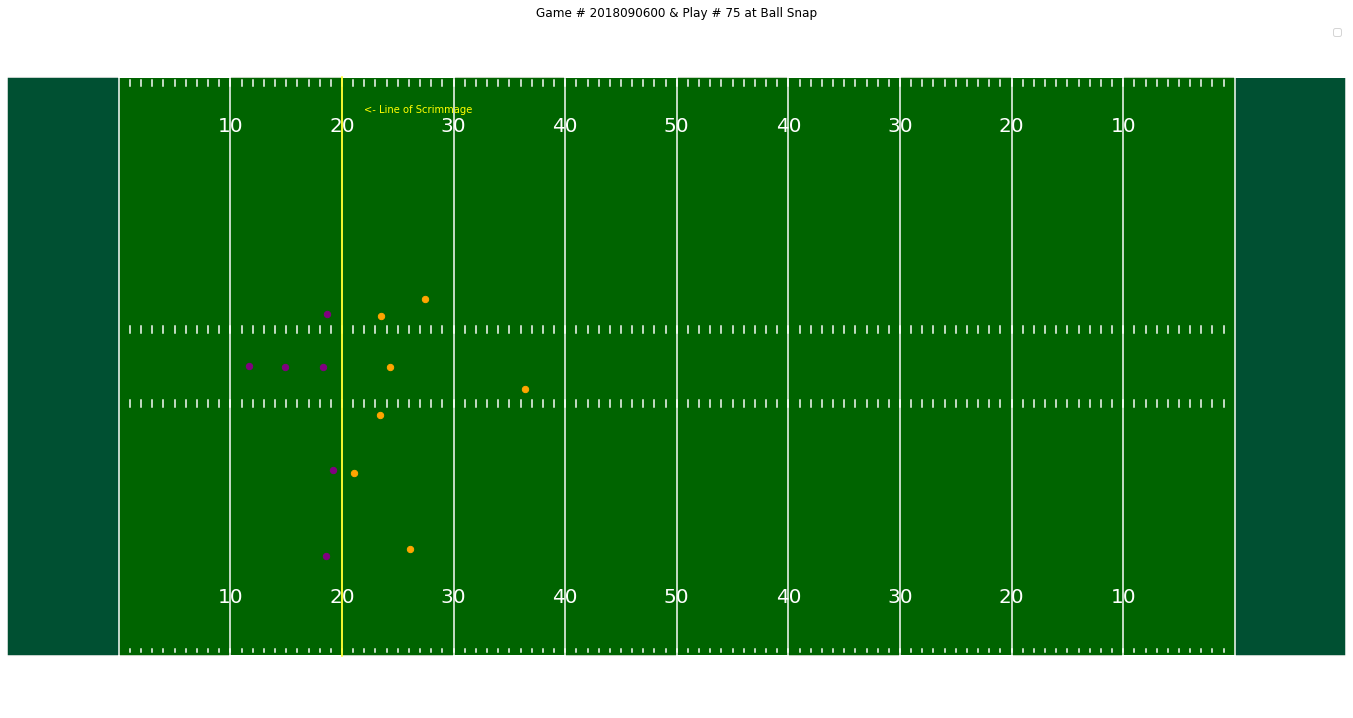

In [ ]:
#creating yardline Variable: 

yl = week1_full.query("playId == @playId")['yardlineNumber'].tolist()[0]

#Telling Graph to show yardline:

fig, ax = create_football_field(highlight_line=True, highlight_line_number = yl)

#graphing players 

example_play_home = week1_full.query('gameId == @gameId and playId == @playId and team == "home"')

example_play_away = week1_full.query('gameId == @gameId and playId == @playId and team == "away"')

#creating graph 
example_play_home.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=40, legend='Away')

example_play_away.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='purple', s=40, legend='Home')

#set title for graph 
plt.title(f'Game # {gameId} & Play # {playId} at Ball Snap')

plt.legend()
plt.show()

#Tracking Player movement

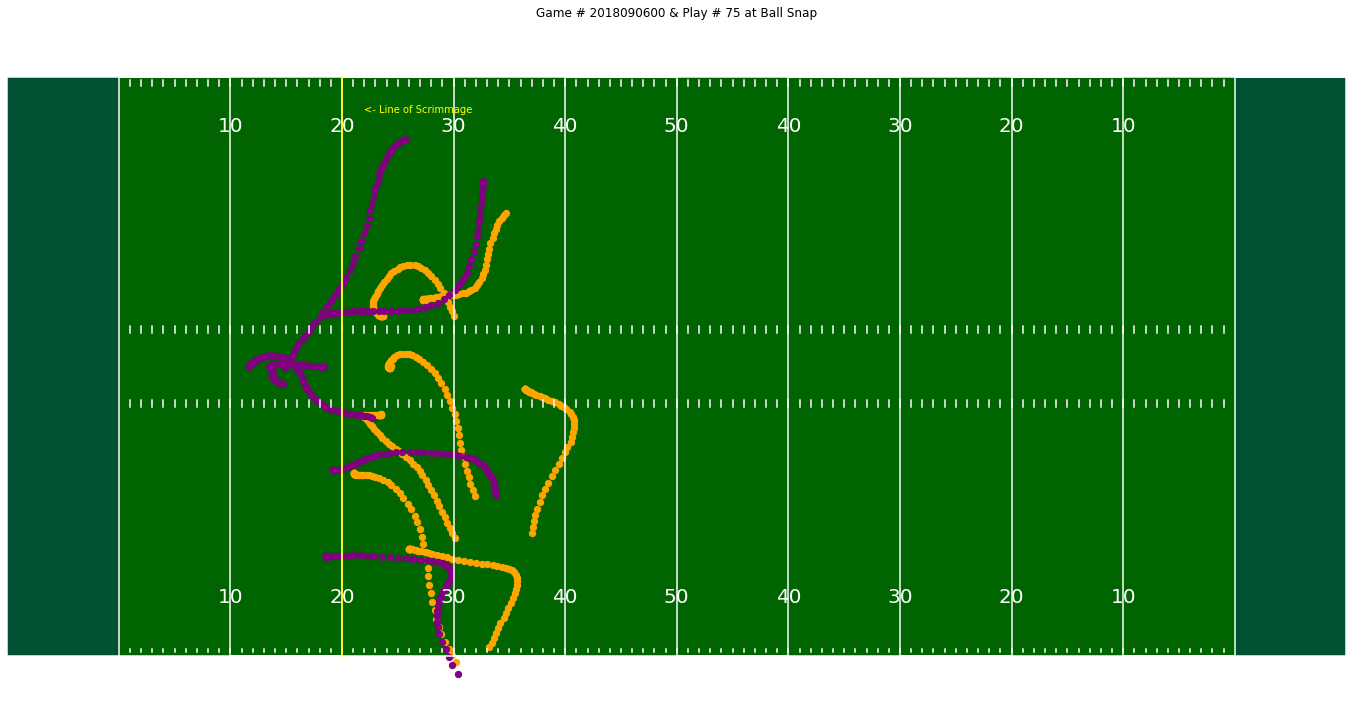

In [ ]:
# in order for this to work all info in adding players must be ran 

fig, ax = create_football_field(highlight_line=True, highlight_line_number=yl)

example_play_home.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=40, legend='Away')

example_play_away.plot(x='x', y='y', kind='scatter', ax=ax, color='purple', s=40, legend='Home')

plt.title(f'Game # {gameId} & Play # {playId} at Ball Snap')





plt.show()